# Assignment #1 (Due Sept 25, 2023)

## Instructions:
- This assignment should be completed individually. 
- Do all the exercises on this notebook.
- Submit your solutions using this notebook on Moodle.
- You may be asked to demonstrate your solutions.
- No late assignment submissions will be accepted. 


## Exercise 1

1. Load the data in the file `sample_data.tsv` as a numpy array. Display it's dimensions (number of rows and columns).
2. Log-transform the data (use base 2 log).
3. Find the row-wise means for replicates of Sample1 and Sample2.
4. Find the row-wise standard deviations the same way as means.
5. Use a function *scipy.stats.ttest_ind* to calculate p-value for every row.
6. Select p-values which are smaller than $10^{-2}$.
7. Print how many P-values below $10^{-2}$ are found.

### Solution:

In [1]:
import numpy as np
file_path = 'sample_data.tsv'

data = np.genfromtxt(file_path, delimiter='\t')

# Display the dimensions (number of rows and columns)
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 101
Number of columns: 14


In [2]:
# Log-transform the data using base 2 logarithm
log_transformed_data = np.log2(data)
log_transformed_data


array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 7.26669594,  9.10149542,  8.88960394, ...,  1.28088223,
        -0.07287048,  3.37372934],
       [ 7.93102881,  8.02073706,  5.88487275, ...,  5.76308762,
         3.74724673,  9.89209522],
       ...,
       [ 9.16390943, 11.14807425, 10.44934292, ..., 12.90187952,
        14.49917916, 13.81215775],
       [ 7.81476334,  7.45498368,  8.78021624, ...,  3.74057346,
        -1.03690026,  1.4277366 ],
       [ 9.38860795, 10.22292945, 10.77335213, ...,  9.53294441,
         9.94665893,  6.1100376 ]])

### 3. Find the row-wise means for replicates of Sample1 and Sample2.


In [3]:

sample1_data = data[:, :8]  
sample2_data = data[:, 8:]  

# Calculate the row-wise means for "Sample1" and "Sample2"
sample1_means = np.mean(sample1_data, axis=1)
sample2_means = np.mean(sample2_data, axis=1)

# Print the row-wise means for Sample1
print("Row-wise means for Sample1:")
print(sample1_means)

# Print the row-wise means for Sample2
print("\nRow-wise means for Sample2:")
print(sample2_means)

Row-wise means for Sample1:
[           nan 2.76718715e+02 2.15685388e+02 2.87488882e+02
 1.11325475e+02 8.67214086e+02 1.32068977e+03 6.10623743e+02
 5.24908308e+03 6.24140890e+00 1.62353596e+02 8.32745507e+01
 3.34037564e+02 4.75713440e+00 3.93630640e+02 1.22423868e+03
 1.30816240e+01 1.19034923e+01 1.02243589e+02 5.88555237e+01
 7.43905248e+00 2.12933237e+01 8.26818749e+03 1.16760812e+01
 1.22701355e+04 4.87220112e+02 1.80034607e+03 1.95228562e+03
 4.33275509e+02 2.33645004e+03 4.43083036e+02 1.14979385e+03
 2.11158875e+05 1.62850757e+02 4.46333072e+01 3.26932922e+03
 2.73457196e+02 4.41855954e+01 5.79075126e+02 2.84021834e+03
 7.64125592e+01 1.56295221e+01 3.04899396e+01 1.96960495e-01
 3.29842055e+01 9.83663645e+02 4.24356240e+03 4.34362067e+02
 6.07588468e+02 1.04585960e+03 1.89839896e+02 6.07059468e+02
 9.42415284e+01 2.21375443e+06 1.24020704e+01 1.63220361e+01
 7.47542126e+00 1.87933101e+03 3.95560022e+02 7.79010152e+02
 2.42067399e+02 1.71782603e+01 4.31962635e+02 5.70651370e

### 4. Find the row-wise standard deviations the same way as means.


In [4]:
sample1_stddev = np.std(sample1_data, axis=1)
sample2_stddev = np.std(sample2_data, axis=1)

# Print the row-wise standard deviations for Sample1
print("Row-wise standard deviations for Sample1:")
print(sample1_stddev)

# Print the row-wise standard deviations for Sample2
print("\nRow-wise standard deviations for Sample2:")
print(sample2_stddev)

Row-wise standard deviations for Sample1:
[           nan 1.60785594e+02 1.74239548e+02 1.78689627e+02
 1.17538219e+02 7.75049208e+02 9.41476660e+02 9.33736551e+02
 5.21578356e+03 7.95450583e+00 1.14083642e+02 8.78476762e+01
 3.03616572e+02 3.65422674e+00 3.72903720e+02 1.13494977e+03
 1.09437284e+01 7.52552730e+00 1.21011990e+02 6.21559242e+01
 9.99727224e+00 1.52839258e+01 7.10804904e+03 6.71289053e+00
 1.51000039e+04 3.48661430e+02 8.55947408e+02 3.30645739e+03
 3.71884674e+02 1.57594451e+03 3.59896513e+02 1.25676396e+03
 1.59472349e+05 9.48311241e+01 2.68853670e+01 2.41653237e+03
 1.42933069e+02 3.11351166e+01 5.69829054e+02 2.01816681e+03
 1.20505236e+02 1.70236573e+01 3.46091015e+01 1.38834815e-01
 2.43174055e+01 1.25071983e+03 2.91931602e+03 3.31748766e+02
 4.80932371e+02 1.41560055e+03 1.46481239e+02 3.01804961e+02
 7.76509920e+01 1.72300053e+06 2.12259634e+01 1.65858184e+01
 8.23731824e+00 1.57343268e+03 2.86643065e+02 4.80335724e+02
 2.39978282e+02 1.21148112e+01 2.59677949e+

## 5. Use a function *scipy.stats.ttest_ind* to calculate p-value for every row.

In [5]:
from scipy import stats
p_values = []

# Iterate through the rows and calculate t-test p-values
for row1, row2 in zip(sample1_data, sample2_data):
    t_stat, p_value = stats.ttest_ind(row1, row2)
    p_values.append(p_value)

# Convert p_values to a NumPy array for easy manipulation
p_values = np.array(p_values)

# Print the calculated p-values
print("Calculated p-values:")
print(p_values)

Calculated p-values:
[           nan 3.16187115e-03 9.63210988e-01 5.73851284e-03
 5.83979539e-02 3.14570681e-02 8.50385923e-03 4.23313904e-01
 2.24184170e-01 1.08267180e-01 1.56177809e-02 1.51625683e-03
 5.19436370e-02 1.21132047e-02 3.41268183e-02 3.08487925e-02
 1.95037894e-02 4.04945452e-03 1.34229856e-01 5.64696019e-02
 2.03449893e-01 6.65925935e-02 4.75720256e-01 7.64211655e-04
 9.04229266e-02 8.13770288e-03 5.09906171e-03 3.81511360e-01
 6.52434098e-03 4.43979736e-03 1.84035372e-01 6.01785261e-02
 3.51598575e-02 7.41796860e-03 2.69708329e-03 4.27056884e-02
 4.24698271e-03 7.39787825e-03 3.98696855e-02 9.07628097e-04
 1.76058296e-01 3.19421665e-02 5.88926028e-01 7.40204224e-03
 1.29226614e-02 8.17932085e-01 6.42032605e-03 1.32439454e-02
 1.39288177e-02 5.15618990e-04 1.05973192e-02 8.93333339e-04
 2.17896734e-02 4.82288831e-03 2.23078356e-01 5.78307222e-02
 1.29250097e-01 5.69283682e-03 3.12244538e-01 1.05666673e-01
 9.07544446e-04 6.77233407e-02 3.69902658e-03 2.19985135e-02
 9.

## 6. Select p-values which are smaller than $10^{-2} 


In [6]:
selected_p_values = p_values[p_values < 1e-2]

# Print the selected p-values
print("Selected p-values smaller than 10^-2:")
print(selected_p_values)

Selected p-values smaller than 10^-2:
[3.16187115e-03 5.73851284e-03 8.50385923e-03 1.51625683e-03
 4.04945452e-03 7.64211655e-04 8.13770288e-03 5.09906171e-03
 6.52434098e-03 4.43979736e-03 7.41796860e-03 2.69708329e-03
 4.24698271e-03 7.39787825e-03 9.07628097e-04 7.40204224e-03
 6.42032605e-03 5.15618990e-04 8.93333339e-04 4.82288831e-03
 5.69283682e-03 9.07544446e-04 3.69902658e-03 9.55201774e-04
 4.65339163e-03 8.50734070e-05 9.93166731e-04 1.55436453e-03
 7.22144115e-03 1.65662535e-03 4.12783492e-03 5.16781157e-03
 9.45611606e-04 3.73076304e-03 5.68390139e-03 2.40674807e-03
 1.07902704e-03 4.68451090e-03 8.81475841e-03 8.91477239e-05]


## Print how many P-values below $10^{-2}$ are found.

In [7]:

num_selected_p_values = len(selected_p_values)
print(f"Number of p-values below 10^-2: {num_selected_p_values}")

Number of p-values below 10^-2: 40


-----------------

## Exercise 2

1. Create a pandas **DataFrame with 100 rows** and the following 3 colums:

    * `row_position`: integers from 0 to 99.
    * `row_index`: integers from 1 to 100.
    * `random_text`: any string of your choice (can be the same for all rows).
   
   Here is how the DataFrame should look like (first 5 rows)

row_position  | row_index | random_text
---           | ----      | ----
0             |  1        | hello from pandas
1             |  2        | hello from pandas
2             |  3        | hello from pandas
3             |  4        | hello from pandas

2. Print the first and last 5 rows of the DataFrame (in two separate commands). 

3. Set the values of the `row_index` column as **index** of the dataframe. After this operation, the
   index values should be numbers from 1 to 100, and not from 0 to 99 (the default).

2. Create a selection of the first 7 rows and the first 2 columns of the DataFrame using **both**
   `.loc` and `.iloc` (i.e. please perform the selection twice, once with `.loc` and once with `.iloc`).

3. Add a new column named `reverse_index` that contains index values in the reverse order (so, basically, 
   the numbers from 100 to 1).

4. Delete the `index` column from the data frame.

5. Create a selection of all rows with an index number multiple of 11 (i.e. rows with index 11, 22, 33, 
   etc..) and the first 2 columns of the data frame.

### Solution:

In [8]:
import pandas as pd
df = pd.DataFrame()
df['row_position'] = np.arange(100)
df['row_index'] = np.arange(1, 101)
df['random_text'] = 'Hello'



In [9]:
#First five rows
df.head()

,row_position,row_index,random_text
0,0,1,Hello
1,1,2,Hello
2,2,3,Hello
3,3,4,Hello
4,4,5,Hello


In [10]:
#Last five rows
print(df.tail())

    row_position  row_index random_text
95            95         96       Hello
96            96         97       Hello
97            97         98       Hello
98            98         99       Hello
99            99        100       Hello


In [11]:
# Set the 'row_index' column as the index and adjust the index to start from 1
df.set_index('row_index', inplace=True)
print(df.head())

           row_position random_text
row_index                          
1                     0       Hello
2                     1       Hello
3                     2       Hello
4                     3       Hello
5                     4       Hello


### 2. Create a selection of the first 7 rows and the first 2 columns of the DataFrame using **both** .loc and .iloc (i.e. please perform the selection twice, once with .loc and once with .iloc`).

In [12]:
# Selection using .loc

selection_loc = df.loc[1:7, ['row_position', 'random_text']]

# Selection using .iloc
selection_iloc = df.iloc[0:7, 0:2]

# Display the selections
print("Selection using .loc:")
print(selection_loc)

print("\nSelection using .iloc:")
print(selection_iloc)

Selection using .loc:
           row_position random_text
row_index                          
1                     0       Hello
2                     1       Hello
3                     2       Hello
4                     3       Hello
5                     4       Hello
6                     5       Hello
7                     6       Hello

Selection using .iloc:
           row_position random_text
row_index                          
1                     0       Hello
2                     1       Hello
3                     2       Hello
4                     3       Hello
5                     4       Hello
6                     5       Hello
7                     6       Hello


### 3. Add a new column named reverse_index that contains index values in the reverse order (so, basically, the numbers from 100 to 1).

In [13]:
df['reverse_index'] = np.arange(100, 0, -1)
print(df)

           row_position random_text  reverse_index
row_index                                         
1                     0       Hello            100
2                     1       Hello             99
3                     2       Hello             98
4                     3       Hello             97
5                     4       Hello             96
...                 ...         ...            ...
96                   95       Hello              5
97                   96       Hello              4
98                   97       Hello              3
99                   98       Hello              2
100                  99       Hello              1

[100 rows x 3 columns]



### 4. Delete the `index` column from the data frame.

In [14]:
# Reset the index to the default integer index
df.reset_index(drop=True, inplace=True)
df


,row_position,random_text,reverse_index
0,0,Hello,100
1,1,Hello,99
2,2,Hello,98
3,3,Hello,97
4,4,Hello,96
...,...,...,...
95,95,Hello,5
96,96,Hello,4
97,97,Hello,3
98,98,Hello,2


In [15]:
# Create a selection of rows with an index number multiple of 11 and the first 2 columns
selection = df[df.index % 11 == 0].iloc[:, 0:2]
print(selection)

    row_position random_text
0              0       Hello
11            11       Hello
22            22       Hello
33            33       Hello
44            44       Hello
55            55       Hello
66            66       Hello
77            77       Hello
88            88       Hello
99            99       Hello


-----------------


## Exercise 3

Use the following 2 files for this exercise:
(originally downloaded from [number of hospitalised persons](https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_hospitalized_switzerland_openzh.csv) and [canton demographics](https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/demographics.csv)):
* `switzerland_covid19_hospitalized.csv`: contains daily records of the number of hospitalized
  COVID-19 patients per Canton, from February 2020 to May 2021.
  The count for each canton are in a separate column, whose header is the Canton abreviation.
* `switzerland_demographics.csv`: contains the number of inhabitants ("Population" field) of each
  swiss Canton, as well as other data.

<br>

Combining these two datasets, our objective is to identify, for each Canton, the date at which the hosptitalization rate of COVID-19 patients was maximal.  
Here are step-by-step instructions to help you:

1. Read the 2 files as pandas `DataFrame` - name them `df_hosp` (hospitalized patient count) and 
   `df_demo` (demography) respectively.
2. Set the index `df_hosp` to the content of its `Date` column. Set the index of `df_demo` to the
   content of its `Canton` column.
3. In the DataFrame `df_hosp`, keep only columns `AG` to `CH`.
4. From `df_demo`, extract the `Population` column data as a panda Series and store it in a variable
   named `pop_by_canton`.
  
5. Using `pop_by_canton`, we can now convert the absolute counts of hospitalized people per canton in
   `df_hosp` into relative counts per 10'000 inhabitants.
   
   **Hint:** we can take advantage of the fact that, when **dividing a DataFrame by a Series**, 
   pandas will divide each column of the DataFrame by the value in the Series whose index is matching
   the DataFrame's column names.
   
   
5. Finally, we can now get for each canton the date at which the hosptitalization rate was maximal.

   **Hint:** since the index of `df_hosp` contains the calendar date associated to each row, we can
   use the `idxmax()` method of DataFrame that returns, for each column, the index of the row that 
   contains the highest value in the column.
   
You can verify your result by comparing it to the values of the following 3 Cantons:
```
BL    2020-03-29
VD    2020-11-16
ZH    2020-12-21
```
    

### Solution:

In [16]:
df_hosp=pd.read_csv(r"D:\xls\switzerland_covid19_hospitalized.csv")
df_demo=pd.read_csv(r"D:\xls\switzerland_demographics.csv")


In [17]:
df_hosp.columns

Index(['Date', 'AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL',
       ...
       'VS_diff_pc', 'ZG_diff', 'ZG_pc', 'ZG_diff_pc', 'ZH_diff', 'ZH_pc',
       'ZH_diff_pc', 'CH_diff', 'CH_pc', 'CH_diff_pc'],
      dtype='object', length=109)

## Set the index `df_hosp` to the content of its `Date` column. Set the index of `df_demo` to the
## content of its `Canton` column.

In [19]:

df_hosp.set_index('Date', inplace=True)
df_demo.set_index('Canton', inplace=True)

In [20]:

# Select columns 'AG' to 'CH'
df_hosp = df_hosp.loc[:, 'AG':'CH']

df_hosp.columns


Index(['AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU',
       'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS',
       'ZG', 'ZH', 'CH'],
      dtype='object')

### 4. From `df_demo`, extract the `Population` column data as a panda Series and store it in a variable named `pop_by_canton`.

In [21]:

pop_by_canton = df_demo['Population']
print(pop_by_canton)


Canton
ZH    1520968
BE    1034977
VD     799145
AG     678207
SG     507697
GE     495249
LU     409557
TI     353343
VS     343955
FR     318714
BL     288132
TG     276472
SO     273194
GR     198379
BS     194766
NE     177964
SZ     159165
ZG     126837
SH      81991
JU      73419
AR      55234
NW      43223
GL      40403
OW      37841
UR      36433
AI      16145
CH    8541410
Name: Population, dtype: int64


-----------------

## 5. Using `pop_by_canton`, we can now convert the absolute counts of hospitalized people per canton in `df_hosp` into relative counts per 10'000 inhabitants.

In [22]:

# Calculate the relative counts per 10,000 inhabitants
relative_counts_per_10000 = df_hosp.div(pop_by_canton, axis=1) * 10000

# Display the DataFrame with the relative counts
relative_counts_per_10000



,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,0.154031,0.004683,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,0.154031,0.018732,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.050053,0.232589,NaN,NaN
2020-02-29,NaN,NaN,NaN,NaN,0.034706,0.205375,0.021074,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.050053,0.232589,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07,0.781472,2.477547,NaN,NaN,0.485888,2.053747,0.830074,0.533394,1.049977,2.227557,...,0.609823,0.549060,NaN,0.39787,1.216948,1.372382,1.076150,0.668692,0.473048,0.716649
2021-05-08,NaN,NaN,NaN,NaN,0.659420,1.694341,0.817195,0.533394,1.029785,0.000000,...,NaN,NaN,NaN,0.54255,1.216948,NaN,1.088664,0.523324,0.473048,0.657476
2021-05-09,NaN,NaN,NaN,NaN,0.659420,1.694341,0.831244,0.564770,0.969209,0.000000,...,NaN,NaN,NaN,0.57872,1.216948,NaN,1.176257,0.552398,0.473048,0.657476


In [23]:

max_date_by_canton = df_hosp.idxmax()
print(max_date_by_canton)
#You can verify your result by comparing it to the values of the following 3 Cantons:
# ```
# BL    2020-03-29
# VD    2020-11-16
# ZH    2020-12-21


AG    2020-12-22
AI    2020-11-02
AR    2020-12-08
BE    2020-11-08
BL    2020-03-29
BS    2020-12-22
FR    2020-11-11
GE    2020-11-16
GL    2021-01-20
GR    2020-11-16
JU    2020-11-03
LU    2020-12-29
NE    2020-11-15
NW    2021-01-20
OW    2020-11-16
SG    2020-11-08
SH    2020-12-07
SO    2020-12-04
SZ    2020-10-15
TG    2021-01-03
TI    2020-11-23
UR    2020-12-16
VD    2020-11-16
VS    2020-11-06
ZG    2020-11-03
ZH    2020-12-21
CH    2020-11-16
dtype: object



## Exercise 4

Load the file `mouse_heart_gene_expresssion.tsv` as a DataFrame.  
Then:
1. Center each column: substract the column's mean from their values.
2. Select only the genes whose expression is above the column-wise average in all the WT samples.

### Solution:

In [24]:
import pandas as pd
file_path = r'D:\xls\mouse_heart_gene_expresssion.tsv'
df = pd.read_csv(file_path, sep='\t')

df


,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
1415670_at,1214.447000,1182.464000,1206.226000,1196.03000,1174.618000,1184.458000,985.550300,1214.540000
1415671_at,3490.098000,2882.784000,2650.033000,2934.86100,2723.976000,2823.260000,2721.884000,2790.834000
1415672_at,4510.369000,4292.057000,4071.057000,4275.27600,4127.941000,4045.990000,4553.736000,4358.635000
1415673_at,598.833400,385.017800,458.487200,514.29190,584.067100,544.380700,569.115400,323.866800
1415674_a_at,1400.325000,1328.295000,1416.923000,1388.41800,1459.956000,1462.964000,1237.244000,1797.906000
...,...,...,...,...,...,...,...,...
AFFX-TransRecMur/X57349_5_at,146.783200,258.778900,170.956400,162.19850,174.527900,152.904700,165.333800,186.463900
AFFX-TransRecMur/X57349_M_at,118.580200,72.545230,151.404400,142.05830,153.837600,189.112200,156.097700,85.870910
AFFX-TrpnX-3_at,37.541160,17.120320,8.123062,16.65299,1.358030,9.211876,15.862080,4.221106
AFFX-TrpnX-5_at,36.217240,43.706570,39.679710,45.32209,5.578330,40.692140,55.606460,33.596600


### 1. Center each column: substract the column's mean from their values.


In [25]:
column_means = df.mean()
centered_df = df - column_means
centered_df


,Heart_WT_1,Heart_WT_2,Heart_WT_3,Heart_WT_4,Heart_KO_1,Heart_KO_2,Heart_KO_3,Heart_KO_4
1415670_at,243.835983,206.837302,265.135307,288.023942,136.629972,217.902793,-22.587846,261.672802
1415671_at,2519.486983,1907.157302,1708.942307,2026.854942,1685.987972,1856.704793,1713.745854,1837.966802
1415672_at,3539.757983,3316.430302,3129.966307,3367.269942,3089.952972,3079.434793,3545.597854,3405.767802
1415673_at,-371.777617,-590.608898,-482.603493,-393.714158,-453.920928,-422.174507,-439.022746,-629.000398
1415674_a_at,429.713983,352.668302,475.832307,480.411942,421.967972,496.408793,229.105854,845.038802
...,...,...,...,...,...,...,...,...
AFFX-TransRecMur/X57349_5_at,-823.827817,-716.847798,-770.134293,-745.807558,-863.460128,-813.650507,-842.804346,-766.403298
AFFX-TransRecMur/X57349_M_at,-852.030817,-903.081468,-789.686293,-765.947758,-884.150428,-777.443007,-852.040446,-866.996288
AFFX-TrpnX-3_at,-933.069857,-958.506378,-932.967631,-891.353068,-1036.629998,-957.343331,-992.276066,-948.646092
AFFX-TrpnX-5_at,-934.393777,-931.920128,-901.410983,-862.683968,-1032.409698,-925.863067,-952.531686,-919.270598


In [26]:
centered_df.columns

Index(['Heart_WT_1', 'Heart_WT_2', 'Heart_WT_3', 'Heart_WT_4', 'Heart_KO_1',
       'Heart_KO_2', 'Heart_KO_3', 'Heart_KO_4'],
      dtype='object')

## 2. Select only the genes whose expression is above the column-wise average in all the WT samples.

In [27]:
#  WT sample columns
wt_sample_columns = ['Heart_WT_1', 'Heart_WT_2', 'Heart_WT_3', 'Heart_WT_4']

# Calculate the column-wise average for WT samples
wt_sample_average = df[wt_sample_columns].mean()
def is_above_average(row):
    return all(row[wt_sample_columns] > wt_sample_average)
selected_genes = df[df.apply(is_above_average, axis=1)]

# selected genes
print(selected_genes)


                      Heart_WT_1  Heart_WT_2  Heart_WT_3  Heart_WT_4  \
1415670_at              1214.447    1182.464    1206.226    1196.030   
1415671_at              3490.098    2882.784    2650.033    2934.861   
1415672_at              4510.369    4292.057    4071.057    4275.276   
1415674_a_at            1400.325    1328.295    1416.923    1388.418   
1415676_a_at            7927.897    6705.278    7242.706    6859.569   
...                          ...         ...         ...         ...   
AFFX-r2-Ec-bioC-5_at    4600.555    4277.752    4360.819    4568.132   
AFFX-r2-Ec-bioD-3_at   24437.630   22834.850   23117.290   22103.410   
AFFX-r2-Ec-bioD-5_at   22073.230   21445.680   20391.220   19246.600   
AFFX-r2-P1-cre-3_at    70849.580   77527.950   66128.730   56309.320   
AFFX-r2-P1-cre-5_at    53018.430   58323.050   49811.450   44437.160   

                      Heart_KO_1  Heart_KO_2  Heart_KO_3  Heart_KO_4  
1415670_at              1174.618    1184.458    985.5503    1214

-----------------

## Exercise 5

Using the data of Usain Bolt's 2008 100 meter olympic record given below, plot the Distance, Velocity, and Acceleration vs. Time.

You should draw the following elements:
* Plot distance, velocity and acceleration as a function of time.
* Add a title.
* Add legends to your axes.
* Add a legend to the plot.  

Here is the raw data:
```python
time = [0, 1.85, 2.87, 3.78, 4.65, 5.50, 6.31, 7.14, 7.96, 8.79, 9.69]
distance = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
velocity = [0, 5.41, 9.80, 10.99, 11.49, 11.76, 12.35, 12.05, 12.20, 12.05, 11.11]
acceleration = [0, 2.92, 4.30, 1.31, 0.57, 0.32, 0.73, -0.36, 0.18, -0.18, -1.04]
```

### Solution:

In [29]:
import matplotlib.pyplot as plt
time = [0, 1.85, 2.87, 3.78, 4.65, 5.50, 6.31, 7.14, 7.96, 8.79, 9.69]
distance = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
velocity = [0, 5.41, 9.80, 10.99, 11.49, 11.76, 12.35, 12.05, 12.20, 12.05, 11.11]
acceleration = [0, 2.92, 4.30, 1.31, 0.57, 0.32, 0.73, -0.36, 0.18, -0.18, -1.04]

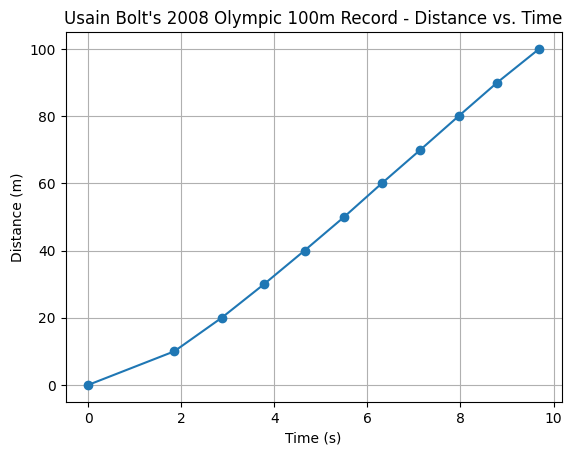

In [30]:

# Create Distance vs. Time Plot
plt.plot(time, distance, marker='o', linestyle='-')
plt.title("Usain Bolt's 2008 Olympic 100m Record - Distance vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.grid(True)
plt.show()


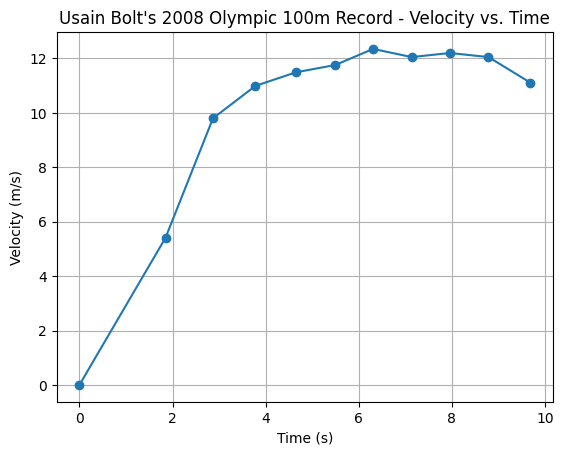

In [31]:
# Create Velocity vs. Time Plot
plt.plot(time, velocity, marker='o', linestyle='-')
plt.title("Usain Bolt's 2008 Olympic 100m Record - Velocity vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.show()


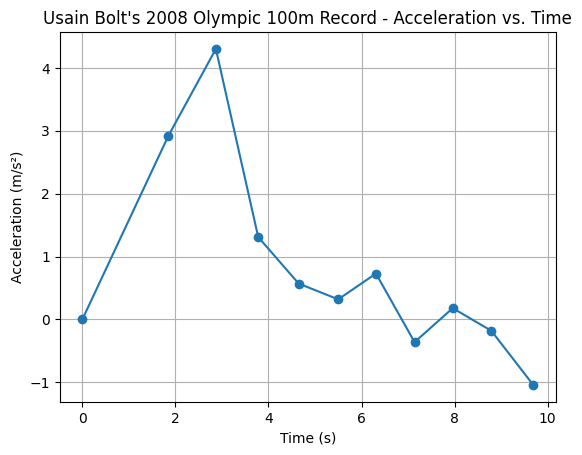

In [32]:
# Create Acceleration vs. Time Plot
plt.plot(time, acceleration, marker='o', linestyle='-')
plt.title("Usain Bolt's 2008 Olympic 100m Record - Acceleration vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.show()

-----------------


## Exercise 6

Using the same data as in exercise 5, change the styling of your Usain Bolt 100m plot, e.g.:
* Draw some lines with dashes.
* Add data point marker symbols on some lines.
* Change the color of lines and marker symbols.

### Solution:

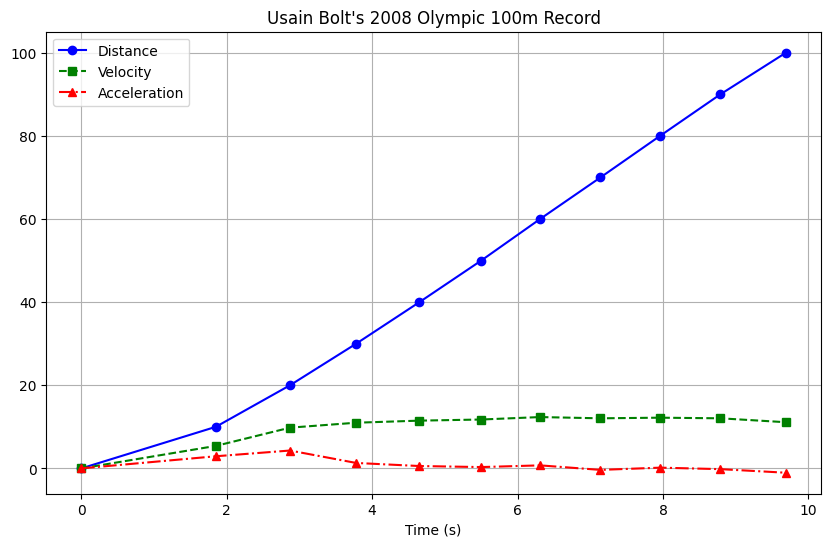

In [33]:
plt.figure(figsize=(10, 6))

# Styling for Distance vs. Time plot
plt.plot(time, distance, linestyle='-', marker='o', color='b', label='Distance')
# Styling for Velocity vs. Time plot
plt.plot(time, velocity, linestyle='--', marker='s', color='g', label='Velocity')
# Styling for Acceleration vs. Time plot
plt.plot(time, acceleration, linestyle='-.', marker='^', color='r', label='Acceleration')

plt.title("Usain Bolt's 2008 Olympic 100m Record")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()

plt.show()

-----------------



## Exercise 7

Given the a lists of height, weight and gender below:
* Create a scatter plot of height (y) as a function of weight (x).
* Give different colors to females and males (see `gender` list below). 
  Specifically, use "teal" color for males, and "darkorange" for females.
* Add a title, and axes labels.

```python
height = [150, 152, 152, 152, 152, 152, 152, 152, 155, 155, 155, 155, 155, 155, 
          155, 155, 155, 155, 157, 157, 157, 157, 157, 157, 157, 157, 160, 160, 
          160, 160, 160, 160, 160, 160, 160, 160, 160, 163, 163, 163, 163, 163, 
          163, 163, 163, 163, 163, 163, 165, 165, 165, 165, 165, 165, 165, 165, 
          168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 
          170, 170, 170, 170, 170, 170, 170, 173, 173, 173, 173, 173, 173, 173, 
          173, 173, 173, 173, 175, 175, 175, 175, 175, 175, 175, 178, 178, 178, 
          178, 178, 178, 178, 180, 180, 180, 183, 183, 183, 183, 183, 183, 183, 
          183, 183, 183, 183, 183, 185, 188, 188, 191, 193]

weight = [73, 72, 45, 59, 95, 62, 54, 68, 77, 92, 83, 56, 47, 77, 63, 81, 52, 
          110, 54, 59, 61, 90, 81, 63, 63, 59, 52, 77, 50, 63, 58, 72, 63, 65, 
          69, 59, 72, 67, 59, 59, 65, 77, 61, 111, 93, 74, 68, 59, 68, 50, 77, 
          74, 65, 72, 77, 86, 61, 65, 53, 60, 67, 99, 61, 70, 97, 54, 88, 99, 
          68, 70, 56, 86, 63, 65, 72, 81, 68, 79, 70, 81, 79, 85, 99, 77, 71, 
          81, 89, 72, 106, 56, 90, 81, 87, 81, 94, 83, 77, 94, 86, 95, 77, 77, 
          92, 77, 77, 131, 97, 101, 108, 99, 90, 91, 86, 113, 126, 104, 81, 77, 
          117, 63, 68, 101]

gender = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 
          2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 
          1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 
          1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 1, 1]
```

### Solution:

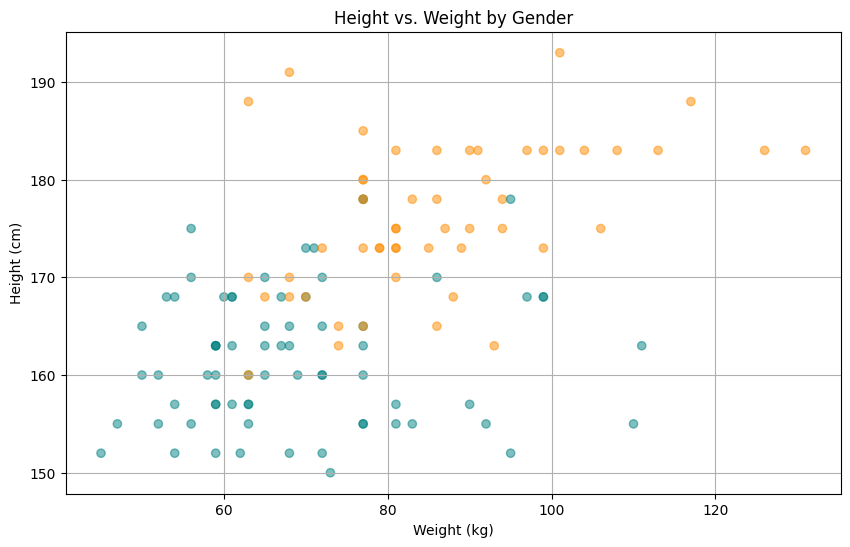

In [34]:
height = [150, 152, 152, 152, 152, 152, 152, 152, 155, 155, 155, 155, 155, 155, 
          155, 155, 155, 155, 157, 157, 157, 157, 157, 157, 157, 157, 160, 160, 
          160, 160, 160, 160, 160, 160, 160, 160, 160, 163, 163, 163, 163, 163, 
          163, 163, 163, 163, 163, 163, 165, 165, 165, 165, 165, 165, 165, 165, 
          168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 
          170, 170, 170, 170, 170, 170, 170, 173, 173, 173, 173, 173, 173, 173, 
          173, 173, 173, 173, 175, 175, 175, 175, 175, 175, 175, 178, 178, 178, 
          178, 178, 178, 178, 180, 180, 180, 183, 183, 183, 183, 183, 183, 183, 
          183, 183, 183, 183, 183, 185, 188, 188, 191, 193]
weight = [73, 72, 45, 59, 95, 62, 54, 68, 77, 92, 83, 56, 47, 77, 63, 81, 52, 
          110, 54, 59, 61, 90, 81, 63, 63, 59, 52, 77, 50, 63, 58, 72, 63, 65, 
          69, 59, 72, 67, 59, 59, 65, 77, 61, 111, 93, 74, 68, 59, 68, 50, 77, 
          74, 65, 72, 77, 86, 61, 65, 53, 60, 67, 99, 61, 70, 97, 54, 88, 99, 
          68, 70, 56, 86, 63, 65, 72, 81, 68, 79, 70, 81, 79, 85, 99, 77, 71, 
          81, 89, 72, 106, 56, 90, 81, 87, 81, 94, 83, 77, 94, 86, 95, 77, 77, 
          92, 77, 77, 131, 97, 101, 108, 99, 90, 91, 86, 113, 126, 104, 81, 77, 
          117, 63, 68, 101]
gender = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 
          2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 
          1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 
          1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 1, 1]
# Define colors for males (teal) and females (darkorange)
colors = ['teal' if g == 2 else 'darkorange' for g in gender]
plt.figure(figsize=(10, 6))
plt.scatter(weight, height, c=colors, alpha=0.5)
plt.title("Height vs. Weight by Gender")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.grid(True)
plt.show()
